<img align="right" src="../img/DEP.png" width="400px">

# Time Series Analysis on GRACE water stores data (with Python)

Contributor: Wu, Ze Wen (https://github.com/zewenwu)

In this notebook, we will explore some of the basic capabilities of Python's Pandas package for the data science's role to explore,
analyze and visualize **time series data**. For numerical analysis of tabular data, the Pandas package includes specific data types and functions for working with two-dimensional tables of data in Python. The Pandas package offers a more convenient structure to work with data - the DataFrame.

A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Very specific pre-processing steps are associated to these kind of data, e.g., missing data filling based on the boundary values, resampling, and/or stationarity checks. In this notebook, we shall explore these concepts with the help of the statsmodels Python module, which provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In this tutorial, we shall use the Monthly time-series data of individual terrestrial water stores including groundwater storage from GRACE (Gravity Recovery and Climate Experiment) satellites and GLDAS Land Surface Models for the world's large aquifer systems data, extracted from the [EU Open Data Portal](https://data.europa.eu/data/datasets/monthly-time-series-data-of-individual-terrestrial-water-stores-including-groundwater-storage-f?locale=en). Monthly anomalies (August 2002 to July 2016) of total terrestrial water storage (TWS), soil moisture storage (SMS), surface water storage (SWS), snow water storage (SNS), groundwater storage (GWS) derived from an ensemble mean of 3 gridded GRACE products (CSR, JPL-Mascons and GRGS) and an ensemble mean 4 land surface models (CLM, NOAH, VIC and MOSAIC), provided by the NASA’s Global Land Data Assimilation System (GLDAS). Monthly precipitation (CRU) data, derived from the Climatic Research Unit (CRU), were aggregated over each aquifer system. GRACE, GLDAS and CRU datasets are publicly available at the global scale. (NERC grant NE/M008932/1). Associated published paper can be found [here](https://esd.copernicus.org/articles/11/755/2020/).

Contents:
- Exploring times series data with Pandas dataframes
- Visualize data with Matplotlib
- Resampling data
- Stationarity
- Time Series Decomposition
- Differencing
- Autocorrelation
- ARIMA models
- Appendix 1: Other file formats

What you will learn:
- Exploring time series data with Pandas package using Python
- Make customized data visualization with Matplotlib package using Python
- Manipulating time series data for your use case, such as: resampling, decomposition, differencing
- Describe time series characteristics for your use case, such as: stationarity, autocorrelation
- Create ARIMA time series prediction models

Remark:
- You have to run the code cells in sequence. Some code blocks may depend on variables from previous code blocks.
- If you are executing this tutorial on a local computer, please setup the Anaconda3 Python environment before executing the following Python codes. In the Big Data Test Infrastructure (BDTI), this Python environment will be set up for you. Furthermore, you can utilize the BDTI resources to do computational heavy calculations and data storage.

Source:
- [Time Series Analysis: A complete guide](https://www.kaggle.com/andreshg/timeseries-analysis-a-complete-guide)
- [DataScience-HEP](https://github.com/biancini/DataScience-HEP/blob/master/Lezioni/Lezione%206.A%20-%20Time%20Series.ipynb)
- [Pandas documentation](https://pandas.pydata.org/docs/)
- [Matplotlib documentation](https://matplotlib.org/3.3.2/contents.html)
- [statsmodels](https://www.statsmodels.org/stable/index.html)

## Exploring times series data with Pandas dataframes

The dataset is saved in the folder eu-open-data in *csv-format*. This is a common data format where the information is delimited using a symbol such as **,** or **;**. To import this data as a Pandas DataFrame into the memory of your computer, the **read_csv** method can be used from the Pandas package. In this method, you need to provide which **delimiter** that is used in the dataset and whether a **header** is present. The header can contain schema information on what the numbers of the data represents. 

More information on Pandas DataFrame can be found in the [Pandas documentation](https://pandas.pydata.org/docs/).

Remark: 
- To import data from other file formats, please look into Appendix 1.

In [1]:
import pandas as pd

# Import the data from local folder
water_data = pd.read_csv('../eu-open-data/water/Paris_Basin_GLDAS_GRACE_GWS_Ensemble_data_v2_11Dec17.csv', delimiter=',', header='infer')

We can visualize the first few rows of the tabular dataset by using the **head** method of the Pandas DataFrame.

In [2]:
# Display some instances
water_data.head()

Year  Month      DecYear        TWS       SMS       SWS       SNS  \
0  2002      8  2002.663014   0.961456 -5.180494 -0.109545 -0.063030   
1  2002      9  2002.745205   2.082083 -5.538095 -0.189455 -0.061931   
2  2002     10  2002.830137   1.899038 -5.229550  0.003442 -0.055510   
3  2002     11  2002.912329   7.302925  1.950854  0.409149 -0.036389   
4  2002     12  2002.997260  13.519343  6.379776  0.239108  0.011602   

        GWS        CRU  
0  6.314524   7.888523  
1  7.871565   3.937273  
2  7.180656   8.662273  
3  4.979310  13.243068  
4  6.888857   9.188637

We observe that the dataset contains information such as:
- The year when the data is measured (**Year**).
- The month when the data is measured (**Month**).
- The decimal year (**DecYear**).
- The total terrestrial water storage (**TWS**).
- The soil moisture storage (**SMS**).
- The surface water storage (**SWS**).
- The snow water storage (**SNS**).
- The groundwater storage (**GWS**) derived from an ensemble mean of 3 gridded GRACE products (CSR, JPL-Mascons and GRGS) and an ensemble mean 4 land surface models (CLM, NOAH, VIC and MOSAIC), provided by the NASA’s Global Land Data Assimilation System (GLDAS).
- The monthly precipitation data (**CRU**), derived from the Climatic Research Unit, were aggregated over each aquifer system.

Since we are dealing with time series data, we want to parse a _date_ column in a so-called datetime structure. This can be induced from existing colums using the **to_datetime** method of the Pandas package. We construct a temporary _timeinfo_ variable using information of the current year and month. Then we use this variable with its format as input for the to_datetime method. 

For more information abou tthe **to_datetime** method please consult [its Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

Like this,

In [3]:
# Construct a date format from the given year and month of the data.
timeinfo = water_data['Year'].astype(str) + '.' + water_data['Month'].astype(str)+ '.1'

# Save and insert the new date column as the first row.
water_data.insert(0,'date','')
water_data['date'] = pd.to_datetime(timeinfo, format='%Y.%m.%d')

# Visualize the new column
water_data

date  Year  Month      DecYear        TWS       SMS       SWS  \
0   2002-08-01  2002      8  2002.663014   0.961456 -5.180494 -0.109545   
1   2002-09-01  2002      9  2002.745205   2.082083 -5.538095 -0.189455   
2   2002-10-01  2002     10  2002.830137   1.899038 -5.229550  0.003442   
3   2002-11-01  2002     11  2002.912329   7.302925  1.950854  0.409149   
4   2002-12-01  2002     12  2002.997260  13.519343  6.379776  0.239108   
..         ...   ...    ...          ...        ...       ...       ...   
163 2016-03-01  2016      3  2016.245902   5.742387  8.157291  0.076225   
164 2016-04-01  2016      4  2016.327869   6.800997  8.950013 -0.035349   
165 2016-05-01  2016      5  2016.412568   7.859608  7.462333  0.405850   
166 2016-06-01  2016      6  2016.494536   7.984359  9.980153  0.052455   
167 2016-07-01  2016      7  2016.579235   5.330345  4.186126 -0.219587   

          SNS       GWS        CRU  
0   -0.063030  6.314524   7.888523  
1   -0.061931  7.871565   3.937273  
2   -0.055510  7.180656   8.662273  
3   -0.036389  4.979310  13.243068  
4    0.011602  6.888857   9.188637  
..        ...       ...        ...  
163 -0.042061 -2.449069   7.262273  
164 -0.060416 -2.053250   6.552159  
165 -0.059487  0.050912  11.374091  
166 -0.064587 -1.983662  10.171023  
167 -0.064211  1.428018   3.014205  

[168 rows x 10 columns]

### Incomplete or Missing values

The common issue of dealing with data is dealing with incomplete or missing data. The **isnull** method of a Dataframe can be used to identify which values are null. This returns a boolean (True or False variable) table which indicates whether the value is null or not. To have a summary of how many null values each features contains, use the **sum** method, like this:

In [4]:
water_data.isnull().sum()

date       0
Year       0
Month      0
DecYear    0
TWS        0
SMS        0
SWS        0
SNS        0
GWS        0
CRU        0
dtype: int64

What do we see here? We observe that we do not have any missing data! That's great news. However, this might not be true for other datasets. For example, there are several ways with dealing with missing data:

- **Option 1**: Fill NaN with Outlier or Zero
In this specific example filling the missing value with an outlier value such as np.inf or 0 seems to be very naive. However, using values like -999, is sometimes a good idea.

- **Option 2**: Fill NaN with Mean Value
Filling NaNs with the mean value is also not sufficient and naive, and doesn't seems to be a good option.

- **Option 3**: Fill NaN with Last Value with .ffill()
Filling NaNs with the last value could be bit better.

- **Option 4**: Fill NaN with Linearly Interpolated Value with .interpolate()
Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring value

For relevant code snippets for the above solutions, please consult [Time Series Analysis: A complete guide](https://www.kaggle.com/andreshg/timeseries-analysis-a-complete-guide).

### Chronological and Equidistant time

Often in time series, we want that the date column be of chronological order and should be equidistant. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.

In [5]:
# Sort the date values of the time series
water_data = water_data.sort_values(by='date')

# Check time intervals
water_data['delta'] = water_data['date'] - water_data['date'].shift(1)
water_data[['date', 'delta']].head()

date   delta
0 2002-08-01     NaT
1 2002-09-01 31 days
2 2002-10-01 30 days
3 2002-11-01 31 days
4 2002-12-01 30 days

What we essentially want is to see whether all the unique values of _delta_ are expected. This can be done using the **unique** method, which returns the unique values of the _delta_ column.

In [6]:
unique_values = water_data['delta'].unique()
unique_values

array([           'NaT', 2678400000000000, 2592000000000000,
       2419200000000000, 2505600000000000], dtype='timedelta64[ns]')

We observe that the **unique** method returns an array of objects timedelta64 from the Pandas package, in unit nanoseconds. We can express the values in days unit by dividing 1 day unit in nanoseconds. Like this,

In [7]:
import numpy as np

unique_values / np.timedelta64(1, 'D')

array([nan, 31., 30., 28., 29.])

From the returned value, we can assume that all the dates are equidistant. Indeed, no _delta_ of two months are observed, for example.

## Visualize data with Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. We shall demonstrate its capabilities on our timeseries data. More information on the Matplotlib package can be found in the [Matplotlib documentation](https://matplotlib.org/3.3.2/contents.html).

First, you need to import matplotlib as an object **plt**. Using its **plot** method, you can specify the x-axis and its y-axis values. Finally, the plot can be displayed using the **show** method. Like this,

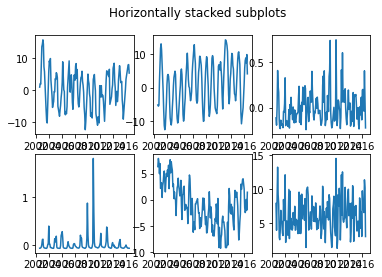

In [8]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a subplots of the data
fig, axs = plt.subplots(2, 3)
fig.suptitle('Horizontally stacked subplots')

axs[0,0].plot(water_data.date, water_data.TWS)
axs[0,1].plot(water_data.date, water_data.SMS)
axs[0,2].plot(water_data.date, water_data.SWS)
axs[1,0].plot(water_data.date, water_data.SNS)
axs[1,1].plot(water_data.date, water_data.GWS)
axs[1,2].plot(water_data.date, water_data.CRU)

# Display the plot
plt.show()

We observe that the above plot needs some improvements. *Matplotlib* offers a wide range of customization that can be applied to your plot. The following code:
- Specifies a bigger figure dimension
- Adds a title and suptitle to the chart (so we know what it represents)
- Adds labels to the X and Y (so we know which axis shows which data)

There is no need to memorize codes for customizing a plot. 
The best method for drawing a visual pleasing plot is by looking up the right commands online and trail-and-error. For example, you can consult [stackoverflow](https://stackoverflow.com/), which is a huge developer community where people post their coding problems and bugs for the community to solve. Another option is to consult your favorite search engine.

<Figure size 720x360 with 0 Axes>

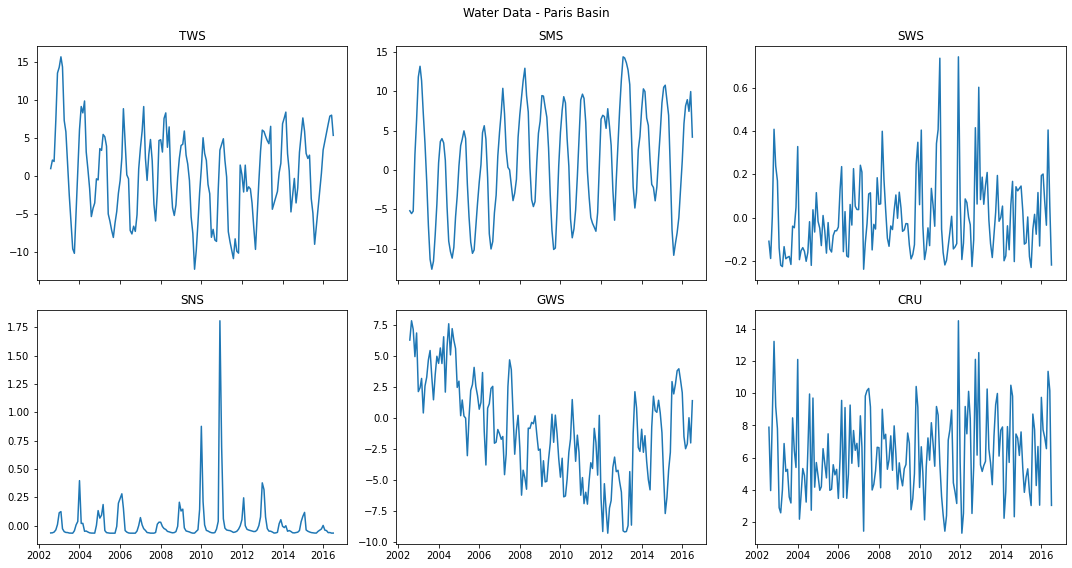

In [9]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a Figure with specified figure size.
fig = plt.figure(figsize=(10,5))

# Create a subplots of the data
fig, axs = plt.subplots(2, 3, figsize=(15,8), sharex=True)
fig.suptitle('Water Data - Paris Basin')

axs[0,0].plot(water_data.date, water_data.TWS)
axs[0,0].set_title('TWS')

axs[0,1].plot(water_data.date, water_data.SMS)
axs[0,1].set_title('SMS')

axs[0,2].plot(water_data.date, water_data.SWS)
axs[0,2].set_title('SWS')

axs[1,0].plot(water_data.date, water_data.SNS)
axs[1,0].set_title('SNS')

axs[1,1].plot(water_data.date, water_data.GWS)
axs[1,1].set_title('GWS')

axs[1,2].plot(water_data.date, water_data.CRU)
axs[1,2].set_title('CRU')

# Display the plot
plt.tight_layout()
plt.show()

## Resampling data

Sometimes, the timestep of your time series data is not the timestep that you desire. Based on the need of increasing or decreasing the timestep, you want to:
- **Upsample**: when the frequency of the samples need to be increased (e.g., days to hours). In this case, additional measurements of that variable is required. Another options would be to fill in these measurements based on assumptions. For example, you can fill in the missing data using a linear interpolation between the known values.
- **Downsample**: when the frequency of the samples need to be decreased (e.g., days to weeks). This might because the original timesteps of the data is too granulair to be relevant (too much data).

For the case of **Downsample**, the **resample** method can be used of the Pandas package. The following code takes the original GWS variable of the data and resample the timesteps from months to resp. 2 months and 3 months using the average (using **mean** method) over the time steps. Finally, the date index will be reset as one of the columns using the **reset_index** method.

For more information of the **resample** method, please consult the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html).

In [10]:
water_data_resampled1 = water_data[['date','GWS']].resample('2M', on='date').mean().reset_index(drop=False)
water_data_resampled2 = water_data[['date','GWS']].resample('3M', on='date').mean().reset_index(drop=False)

Now we can plot the resampled data.

<Figure size 720x720 with 0 Axes>

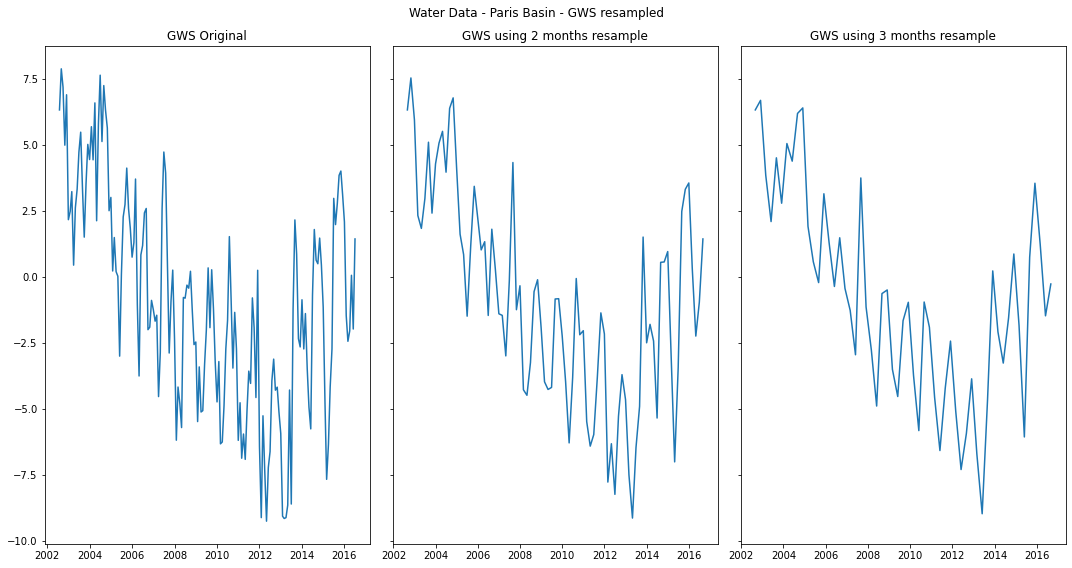

In [11]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a Figure with specified figure size.
fig = plt.figure(figsize=(10,10))

# Create a subplots of the data
fig, axs = plt.subplots(1, 3, figsize=(15,8), sharey=True)
fig.suptitle('Water Data - Paris Basin - GWS resampled')

axs[0].plot(water_data.date, water_data.GWS)
axs[0].set_title('GWS Original')

axs[1].plot(water_data_resampled1.date, water_data_resampled1.GWS)
axs[1].set_title('GWS using 2 months resample')

axs[2].plot(water_data_resampled2.date, water_data_resampled2.GWS)
axs[2].set_title('GWS using 3 months resample')

# Display the plot
plt.tight_layout()
plt.show()

## Stationarity

Time series data can be classified using two quantities:
- **Mean**: Although a time series variable can fluctuate in function of time, the mean over all the observed data might be constant, increasing or decreasing in a "smoother" manner. We say that the mean of the variable is stationary, or for the last two cases, non-stationary.
- **Variance**: The fluctuation of a time series variable might stay the same, become more aggressive (increase), or less aggressive (decrease). We say that the variance of the variable is stationary, or for the last two cases, non-stationary. 

Testing stationarity is a useful pre-processing step as some models such as ARIMA requires that the time series data need to be stationary.

<img align="left" src="../img/stationarity_examples.png" width="1000px">

For example, we can observe that the GWS variable has non-stationary mean and non-stationary variance. Also, we can observe that the CRU variable has stationary mean and stationary variance. Let's show this on some plote,

<Figure size 720x720 with 0 Axes>

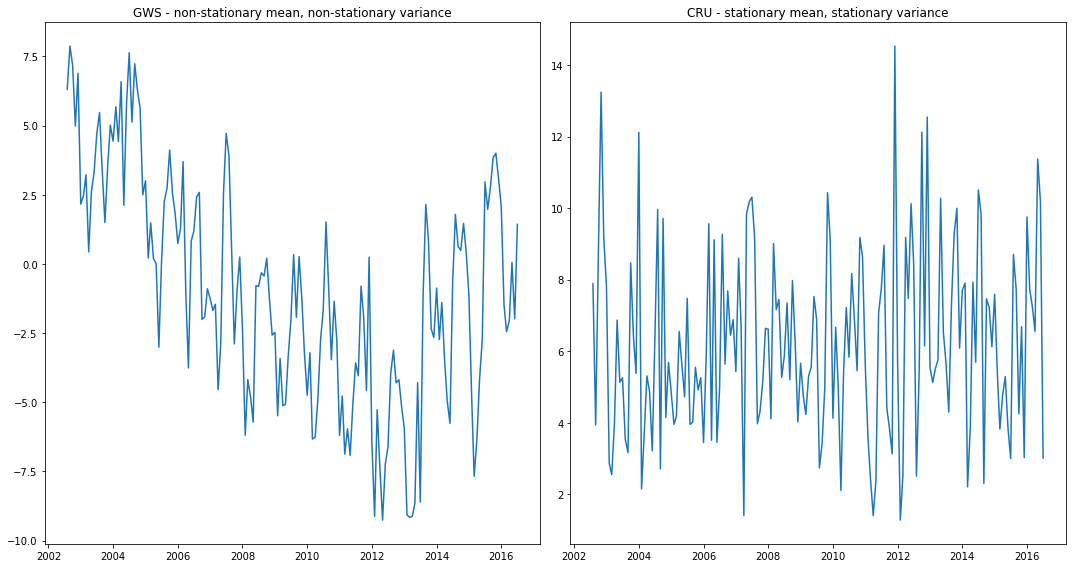

In [12]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a Figure with specified figure size.
fig = plt.figure(figsize=(10,10))

from matplotlib import pyplot as plt
import numpy as np

# Create a subplots of the data
fig, axs = plt.subplots(1, 2, figsize=(15,8))

axs[0].plot(water_data.date, water_data.GWS)
axs[0].set_title('GWS - non-stationary mean, non-stationary variance')

axs[1].plot(water_data.date, water_data.CRU)
axs[1].set_title('CRU - stationary mean, stationary variance')

# Display the plot
plt.tight_layout()
plt.show()

There are several ways to determine the stationarity of variables of the time series data:
- **Visually**: Plot the time series data and observe whether we have a stationary or non-stationary mean or stationary or non-stationary variance, as was done above.
- **Basic statistics**: Split the time series and compare the mean and variance of each partition.
- **Statistical tests**: Use well-defined statistical tests such as the Augmented Dickey Fuller (ADF) test to determine whether the timeseries has stationrary or non-stationary mean or variance.

### The Augmented Dickey-Fuller (ADF) Test 

To demonstrate the ADF test method, we will use the Python package **statsmodels**. This package is one of the best packages for creating statistical models, data handling and model evaluation. This library is famously known for statistical computations, statistical testing, and data exploration.

For more information about **statsmodels**, please consult the [statsmodels documentation](https://www.statsmodels.org/stable/index.html).

From this Python package, we will use the ADF unit root test using its **adfuller** method. The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root.
If the p-value is above a critical size, then we cannot reject that there is a unit root:

- **Null Hypothesis (H0)**: Time series has a unit root. (Time series is not stationary).
- **Alternate Hypothesis (H1)**: Time series has no unit root (Time series is stationary).

For more information about **adfuller**, please consult the [statsmodels documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html?highlight=adfuller#statsmodels.tsa.stattools.adfuller).

Let's use this test to test whether the column GWS of the data is stationary. Like this,

In [13]:
from statsmodels.tsa.stattools import adfuller

# Execute the ADF test for the GWS variable
result = adfuller(water_data.GWS.values)

# Structure the results of the ADF test.
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.475205
p-value: 0.545739
Critical Values:
	1%: -3.474
	5%: -2.880
	10%: -2.577


The second element of the output corresponds to the p-value. We can conclude that we **cannot reject the H0** from the p-value, which means that the GWS values might not be stationary according to the ADF test.

We can repeat this procedure visually for all the columns of the dataset. Like this,

<Figure size 720x360 with 0 Axes>

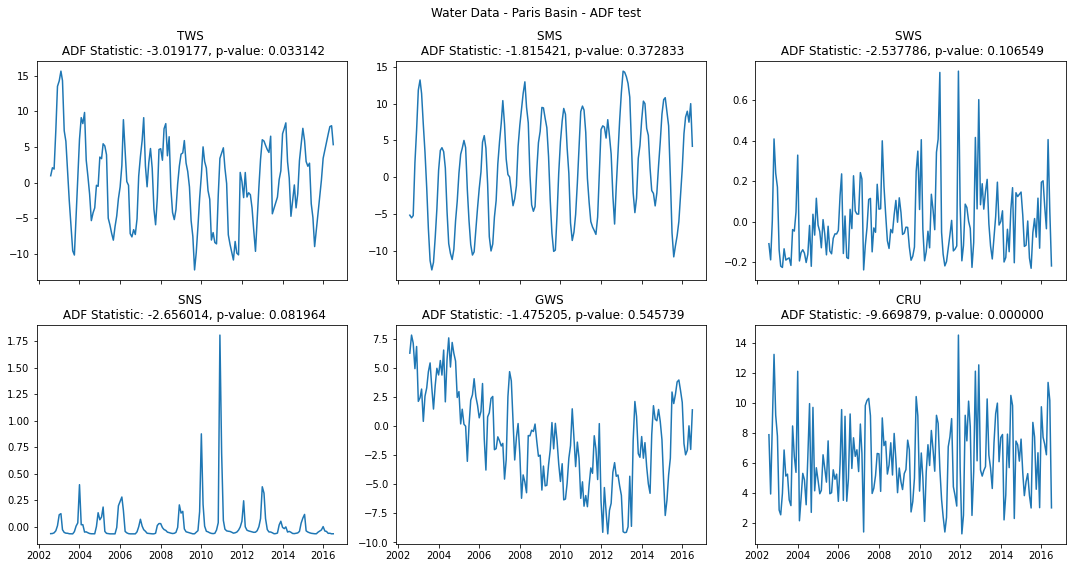

In [14]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a Figure with specified figure size.
fig = plt.figure(figsize=(10,5))

# Create a subplots of the data + display results of ADF tests in the subtitles.
fig, axs = plt.subplots(2, 3, figsize=(15,8), sharex=True)
fig.suptitle('Water Data - Paris Basin - ADF test')

axs[0,0].plot(water_data.date, water_data.TWS)
result = adfuller(water_data.TWS.values)
axs[0,0].set_title('TWS \n ADF Statistic: %f, p-value: %f' % (result[0], result[1]))

axs[0,1].plot(water_data.date, water_data.SMS)
result = adfuller(water_data.SMS.values)
axs[0,1].set_title('SMS \n ADF Statistic: %f, p-value: %f' % (result[0], result[1]))

axs[0,2].plot(water_data.date, water_data.SWS)
result = adfuller(water_data.SWS.values)
axs[0,2].set_title('SWS \n ADF Statistic: %f, p-value: %f' % (result[0], result[1]))

axs[1,0].plot(water_data.date, water_data.SNS)
result = adfuller(water_data.SNS.values)
axs[1,0].set_title('SNS \n ADF Statistic: %f, p-value: %f' % (result[0], result[1]))

axs[1,1].plot(water_data.date, water_data.GWS)
result = adfuller(water_data.GWS.values)
axs[1,1].set_title('GWS \n ADF Statistic: %f, p-value: %f' % (result[0], result[1]))

axs[1,2].plot(water_data.date, water_data.CRU)
result = adfuller(water_data.CRU.values)
axs[1,2].set_title('CRU \n ADF Statistic: %f, p-value: %f' % (result[0], result[1]))

# Display the plot
plt.tight_layout()
plt.show()

If the cutoff of the p-value is 5%, then we can **reject H0** of TWS and CRU, concluding that TWS and CRU are stationary according to the ADF test.

## Time Series Decomposition

We have seen how we can determine whether a time series is stationary or not. However, if you have determined that your time series is not stationary, but still require it to be so (e.g., required by time series modelling methods you want to apply). How can you determine the underlying trend of the time series?

A time series can contain a combination of level, trend, seasonality, and noise:

- **Level**: the average value in the series.
- **Trend**: The increasing or decreasing value in the series.
- **Seasonality**: The repeating short-term cycle in the series.
- **Noise**: The random variation in the series.

We can use the **seasonal_decompose** method from statsmodels to calculate these components of the timeseries. This method allows you to choose two kinds of time series assumptions:

- Additive time series model: Observed = Base Level + Trend + Seasonality + Residual
- Multiplicative time series model: Observed = Base Level x Trend x Seasonality x Residual

For the sake of simplicity, we shall demonstrate how you can use this method on the SMS variable using an additive time series model.

For more information, please consult its [statsmodels user guide](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html).

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the date as indices of the dataset for automatic period determination using seasonal_decompose.
tdi = pd.DatetimeIndex(water_data.date)
water_data = water_data.set_index(tdi)

# Determine the time series components using seasonal_decompose.
decomp = seasonal_decompose(water_data.SMS, model='additive', extrapolate_trend='freq')

<Figure size 720x360 with 0 Axes>

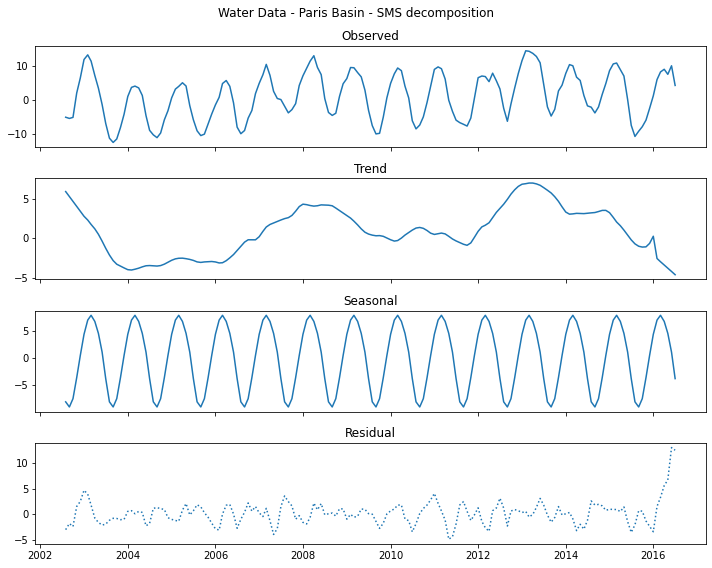

In [16]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a Figure with specified figure size.
fig = plt.figure(figsize=(10,5))

# Create a subplots of the results of the seasonal decomposition.
fig, axs = plt.subplots(4, 1, figsize=(10,8), sharex=True)
fig.suptitle('Water Data - Paris Basin - SMS decomposition')

axs[0].plot(water_data.date, decomp.observed)
axs[0].set_title('Observed')

axs[1].plot(water_data.date, decomp.trend)
axs[1].set_title('Trend')

axs[2].plot(water_data.date, decomp.seasonal)
axs[2].set_title('Seasonal')

axs[3].plot(water_data.date, decomp.resid, linestyle=":")
axs[3].set_title('Residual')

# Display the plot
plt.tight_layout()
plt.show()

Now you can remove the trens and seasonality of the SMS variable like this,

In [17]:
# Subtracting the trend from the observed variable.
residual_SMS = decomp.observed - decomp.trend - decomp.seasonal

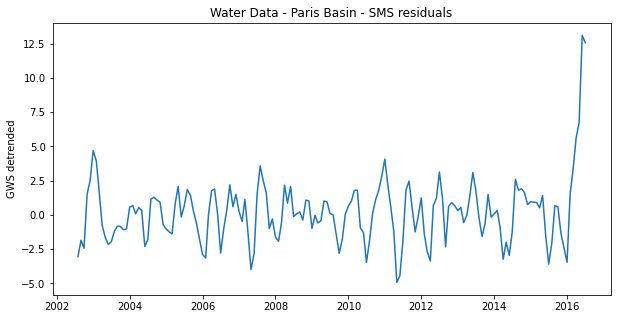

In [18]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a Figure with specified figure size.
fig = plt.figure(figsize=(10,5))

plt.plot(water_data.date, residual_SMS)
plt.title('Water Data - Paris Basin - SMS residuals')
plt.ylabel('GWS detrended')

# Display the plot
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

# Execute the ADF test for the residual GWS variable
result = adfuller(residual_SMS)

# Structure the results of the ADF test.
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.011441
p-value: 0.000000
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


Notice that now the ADF test for the residual SMS is significant.

## Differencing

In the previous section, we removed the trend and the seasonality using the seasonal_decompose method of statsmodels which essentially determines the trend and the seasonality using a fit on the data. Another way to remove trend and seasonality is to use **differencing**, which removes trend and seasonality by continuously taking the difference of consecutive datapoints.

- A *first-order* differencing includes redefining the time series as:
$x^{(1)}_t = x_t - x_{t-1}.$
- A *second-order* differencing includes redefining the time series using the previous *first_order* values:
$x^{(2)}_t = x^{(1)}_t - x^{(1)}_{t-1}.$
- ...

We can calculate the first-order differencing values using the **diff** method of Numpy.


For more information about *differencing*, please consult its section in [Forecasting: Principles and Practice](https://otexts.com/fpp2/stationarity.html).

For more information about the *diff* method, please consult its [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) .

In [20]:
import numpy as np

# First order differencing
t = np.diff(water_data.SMS)
diff_SMS1 = np.append([0], t)

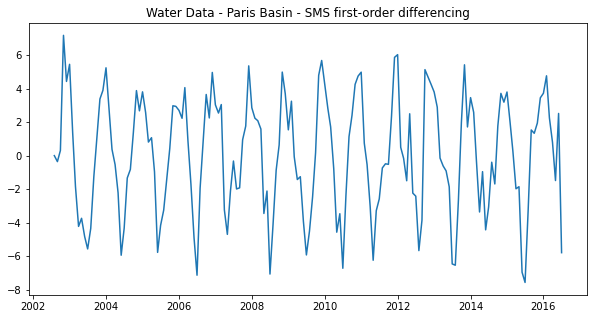

In [21]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a Figure with specified figure size.
fig = plt.figure(figsize=(10,5))

plt.plot(water_data.date, diff_SMS1)
plt.title('Water Data - Paris Basin - SMS first-order differencing')

# Display the plot
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

# Execute the ADF test for the first-order differcing GWS variable
result = adfuller(diff_SMS1)

# Structure the results of the ADF test.
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.333056
p-value: 0.000000
Critical Values:
	1%: -3.472
	5%: -2.880
	10%: -2.576


Notice that now the ADF test for the residual SMS is significant.

## Autocorrelation

Sometimes a time series model requires analyzing the correlation of the timeseries with a certain time lag. A plot visualizing correlations of a time series in function of a given lag is called an autocorrelation plot. We shall visualize these correlation with 
- an autocorrelation plot
- a partial autocorrelation plot.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

We shall use the **plot_acf** and **plot_pacf** methods of statsmodel to plot, resp., the autocorrelation plot and the partical autocorrelation plot.

For information about autocorrelation and partial autocorrelation, please visit this [gentle introduction](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/).

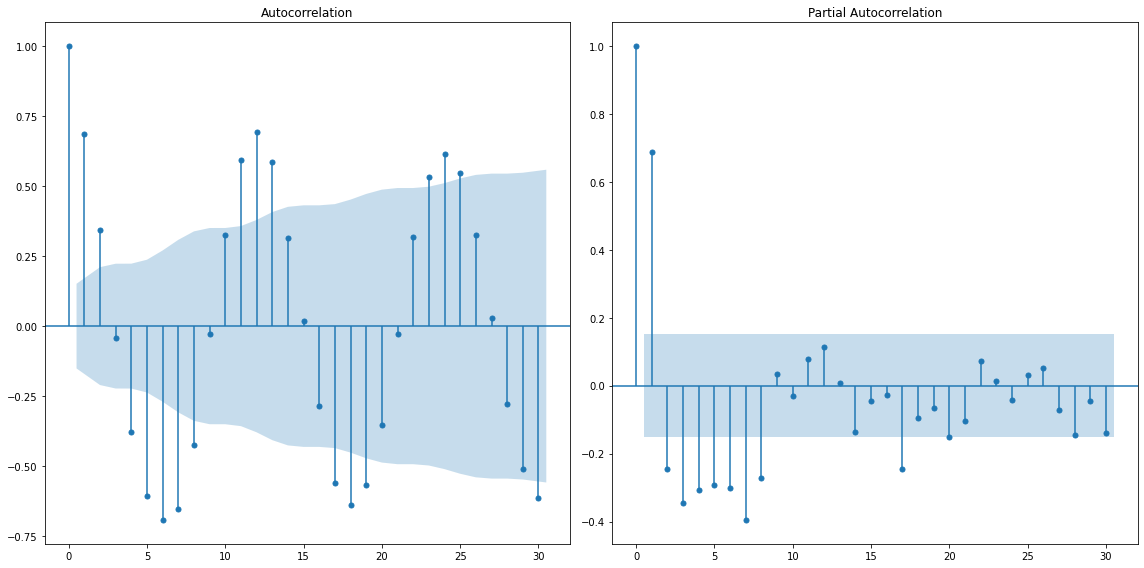

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Maximum 30 lags will be plotted.
lag = 30

# Plotting the Autocorrelation and Partial Autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(16,8))
plot_acf(diff_SMS1, lags=lag, ax=axes[0])
plot_pacf(diff_SMS1, lags=lag, ax=axes[1])

plt.tight_layout()
plt.show()

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical coincidence.

These plots are useful when determining the hyperparameters of time series models such as ARIMA.

## ARIMA models

The Auto-Regressive Integrated Moving Average (ARIMA) model describes the autocorrelations in the data. The model assumes that the time-series is statarionary. It consists of three main parts:
- **The auto-regressive (AR) filter**: $y_t = c + a_1 y_{t-1} + ... + a_p y_{t-p} + \epsilon_t = c + \sum_{i=1}^p a_i y_{t-i} + \epsilon_t$

$\rightarrow$ lag order $p$, to be obtained from PACF in correlation analysis.

- **The integration filter (I)**: 

$\rightarrow$ degree of differencing $d$, the number of differencing executed on the time series.

- **The moving average (MA) filter**: $y_t = c + \epsilon_t + b_1 \epsilon_{t-1} + ... + b_q \epsilon_{t-q} = c + \epsilon_t + \sum_{i=1}^q b_i \epsilon_{t-i}$ 

$\rightarrow$ order of moving average $q$, to be obtained from ACF in correlation analysis.

More information about the ARIMA model, please consult a section in [Forecasting: Principles and Practice](https://otexts.com/fpp2/arima-r.html).

In [24]:
# Splitting the times series in training data and test data
split = 120
y_train = diff_SMS1[:split]
y_test = diff_SMS1[split+1:]

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

# Fit model
[p, d, q] = [8, 1, 2]
model = ARIMA(y_train, order=(p,d,q))
model_fitted = model.fit()

# Prediction with ARIMA
y_pred = model_fitted.forecast(len(y_test))

# Calcuate evaluation metrics
score_mae = mean_squared_error(y_test, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 3.079108319204965


In [26]:
# Displaying the information of the trained ARIMA model.
print(model_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:                 ARIMA(8, 1, 2)   Log Likelihood                -227.363
Date:                Thu, 22 Jul 2021   AIC                            476.727
Time:                        17:33:20   BIC                            507.297
Sample:                             0   HQIC                           489.141
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0708      0.340      0.208      0.835      -0.595       0.736
ar.L2         -0.0223      0.161     -0.139      0.890      -0.337       0.293
ar.L3         -0.2012      0.085     -2.357      0.0

In [27]:
# Predicting the training and test data of the trained ARIMA model for plotting.
first = 10
pred_train_SMS1 = model_fitted.predict(first, len(y_train))
pred_test_SMS1 = model_fitted.predict(len(y_train)+1, len(diff_SMS1))

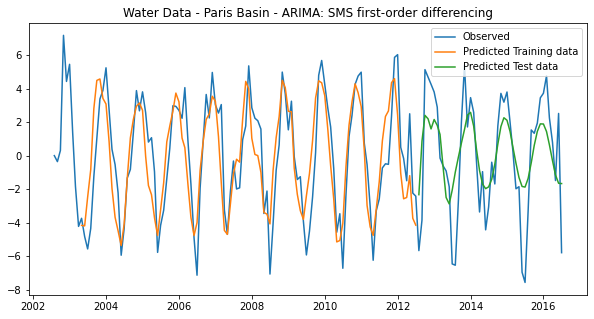

In [28]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a Figure with specified figure size.
fig = plt.figure(figsize=(10,5))

plt.plot(water_data.date, diff_SMS1, label="Observed")
plt.plot(water_data.date[first-1:len(y_train)], pred_train_SMS1, label="Predicted Training data")
plt.plot(water_data.date[len(y_train):], pred_test_SMS1, label="Predicted Test data")
plt.title('Water Data - Paris Basin - ARIMA: SMS first-order differencing')

# Display the plot
plt.legend()
plt.show()

## Appendix 1: Other file formats

In the above tutorial, only csv-files are considered. However, the Pandas DataFrame can also import other file formats. In this appendix, we shall give a short description on how to import other file formats, such as *JSON-format* and *XML-format*.

Let us import some example data,

In [29]:
import pandas as pd

### Method for importing JSON-files.

# Use the built-in method for reading JSON-files
color_data = pd.read_json('../example-data/color.json')
color_data

color value
0      red  #f00
1    green  #0f0
2     blue  #00f
3     cyan  #0ff
4  magenta  #f0f
5   yellow  #ff0
6    black  #000

In [30]:
import pandas as pd
import xml.etree.ElementTree as et

### Method for importing XML-files.

# Define an XML parser for reading XML-files
def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

# Use the defined function.
student_data = parse_XML("../example-data/student.xml", ["name", "email", "grade", "age"])
student_data

name            email grade age
0    John    john@mail.com     A  16
1   Alice   alice@mail.com     B  17
2     Bob     bob@mail.com     C  16
3  Hannah  hannah@mail.com     A  17

However, the downside to this last approach is that you need to know the structure of the XML file in advance. Source: [From XML to Pandas dataframes](https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c).